Reading in Data...
Calculating Cache Values...
1017209  training points
0
1
2
3
4
5
6
7
8
9


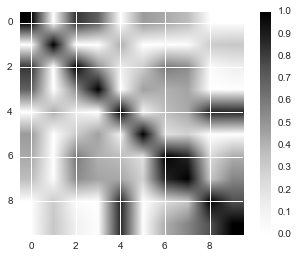

Time for the matrix multiplications
(10L, 1017209L)
(10L,)
Calculating Mu...
41088


In [53]:
from __future__ import division
import numpy as np
import pandas as pd
import sys
from datetime import datetime
from scipy import linalg as la
from sklearn import cluster
from matplotlib import pyplot as plt
import seaborn
%matplotlib inline

"""
Use large-scale Gaussian process regression to make predictions for the Rossman
Store Sales Kaggle Competition.

1. Construct a custom kernel that measures similarity between two different
training data points.

2. Implement an algorithm that selects a set of m landmarks.

3. Show the kernel in action by displaying a mxm kernel matrix K, where
K_ij = k(x_i,x_j) for i,j in {1,...,m}.

4. Implement the "subset of regressors" algorithm.

Finally, construct an actual prediction for the Kaggle competition, submit it,
and have the notebook print the overall prediction MSE and ranking you would 
have received.

Feel free to subsample the training data to whatever size is manageable.
"""

def kernel(xi, xj, test=False):
    """
    Return a value representing the similarity between xi and xj
    
    Add up the kernel functions for Store, DayOfWeek, Date, Customers,
    Open, Promo, StateHoliday, SchoolHoliday and divide by 8.
    """
    
    # maybe just compare the month
    def compare_dates(date1, date2):
        date_format = '%Y-%m-%d'
        d = datetime.strptime(date1, date_format) - datetime.strptime(date2, date_format)
        return float(d.days)
    
    Store = 1.0 - np.abs(int(xi.Store) - int(xj.Store))/1115.0
    DayOfWeek = 1.0 - np.abs(int(xi.DayOfWeek) - int(xj.DayOfWeek))
    Date = 1.0 - np.abs(compare_dates(xi.Date,xj.Date))/365
    Open = int(xi.Open == xj.Open)
    Promo = int(xi.Promo == xj.Promo)
    StateHoliday = int(xi.StateHoliday == xj.StateHoliday)
    SchoolHoliday = int(xi.SchoolHoliday == xj.SchoolHoliday)
    
    # Weight being open, day of the week, # of customers, and date higher
    temp = Store + 2.0*DayOfWeek + 2.0*Date + 4.0*Open + Promo + StateHoliday + SchoolHoliday
    
    return temp/12.0
      
    #a, b = int(xi.Customers), int(xj.Customers)
    #return (temp + 4.0*(1.0 - np.abs(a/max(a,b,1) - b/max(a,b,1))))/16.0
    
def select_landmarks(m):
    """
    Choose m data points based on the test data to create the
    covariance matrix. Should return a Pandas DataFrame
    """
    # Still doing random ones for now
    landmarks = np.random.randint(train_data.shape[0],size=m)
    return train_data.iloc[landmarks]

print "Reading in Data..."

train_data = pd.read_csv('train.csv')
test_data = pd.read_csv('test.csv')
aux_data = pd.read_csv('store.csv')
sample_sub = pd.read_csv('sample_submission.csv')

print "Calculating Cache Values..."

m = 10 
n = train_data.shape[0]
#n = 1000
print n, " training points"
sig2 = 1.0
landmarks = select_landmarks(m)
Kmm = np.zeros((m,m))
Kmn = np.zeros((m,n))
for i in xrange(m):
    print i
    for j in xrange(m):
        Kmm[i,j] = kernel(landmarks.iloc[i],landmarks.iloc[j])
    for j in xrange(n):
        s
        Kmn[i,j] = kernel(landmarks.iloc[i],train_data.iloc[j])

plt.imshow(Kmm,vmin=0.0,vmax=1.0,cmap='Greys')
plt.colorbar()
plt.show()
print "Time for the matrix multiplications"
A = np.dot(la.inv(np.dot(Kmn,Kmn.T) + sig2*Kmm),Kmn)
print A.shape

# visualize kernel matrix1p
# something about the kernel might be saying that nothing is similar
# to anything else, so if it's strongly diagonally dominant that's bad
Ay = np.dot(A,train_data['Sales'][:n])

print Ay.shape

print "Calculating Mu..." 
test_N = test_data.shape[0]
#test_N = 1000
print test_N
mu = np.zeros(test_N)

for i in xrange(0,test_N):
    print i, '\r',
    Ktm = np.zeros(m)
    for j in xrange(m):
        Ktm[j] = kernel(landmarks.iloc[j],test_data.iloc[i],test=True)
    mu[i] = np.dot(Ktm,Ay)

#print mu
sfile = open('mean_sub.csv', 'wb')
sfile.write('"Id","Sales"\n')
for id in range(0, test_N):
    sfile.write('%d,%.2f\n' % (id+1, mu[id]))  # add one for one-based indexing
sfile.close()

In [55]:
print "Private score of 0.41325, Public score 0.37814, ranking not available"

Private score of 0.41325, Public score 0.37814, ranking not available
